In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Наивная байесовская классификация

Наивные байесовские модели — группа исключительно быстрых и простых алгоритмов классификации, зачастую подходящих для наборов данных очень высоких
размерностей. В силу их быстроты и столь небольшого количества настраиваемых
параметров они оказываются очень удобны в качестве грубого эталона для задач
классификации

### Гауссов наивный байесовский классификатор

Cамый простой для понимания наивный байесовский классификатор — Гауссов. В этом классификаторе допущение состоит в том, что данные всех категорий взяты из простого нормального распределения.

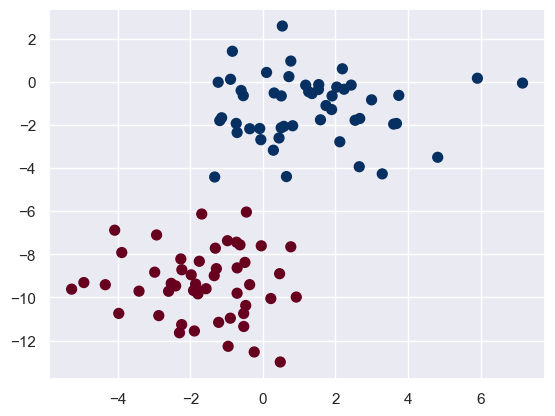

In [15]:
# генерация гауссовских пузырей
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

Для обучения этой модели достаточно найти среднее значение и стандартное отклонение точек внутри каждой из категорий — это все, что требуется для описания подобного распределения.
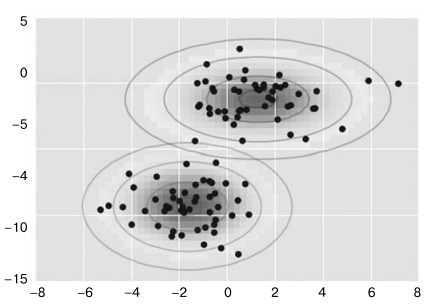

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

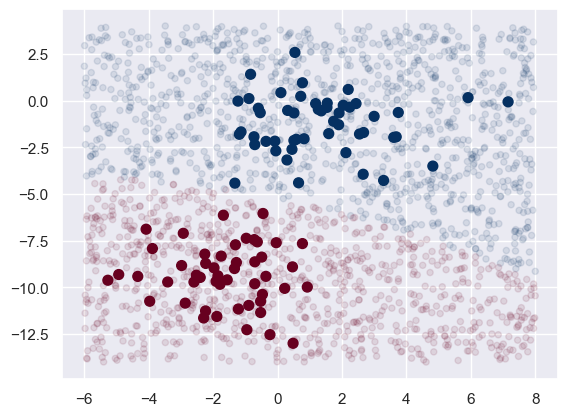

In [22]:
rng = np.random.RandomState(0)
X_new = [-6, -14] + [14, 18] * rng.rand(2000, 2)
y_new = model.predict(X_new)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
# граница принятия решений (decision boundary)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=20, cmap='RdBu', alpha=0.1)

In [25]:
# естественная вероятность классификации
y_prob = model.predict_proba(X_new)
y_prob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### Полиноимальный наивный байесовский классификатор

Допущением - признаки сгенерированы на основе простого полиномиального распределения. Полиномиальный наивный байесовский классификатор нередко используется при классификации текста, где признаки соответствуют
количеству слов или частотам их употребления в классифицируемых документах. 

In [41]:
from sklearn.datasets import fetch_20newsgroups
# "20 дискусионных групп"
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [42]:
# выберем лишь несколько из этих категорий
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
# пример записи из набора данных
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

Чтобы использовать эти данные для машинного обучения, необходимо преобразовать содержимое каждой строки в числовой вектор. Для этого воспользуемся
векторизатором TF–IDF и создадим конвейер, присоединяющий его последовательно
к полиномиальному наивному байесовскому классификатору:

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

In [48]:
model = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

In [49]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Предсказав метки для контрольных данных, мы изучим их, чтобы выяснить эффективность работы оценивателя. Построим матрицу различий.

Text(47.24999999999999, 0.5, 'Прогнозируемая метка')

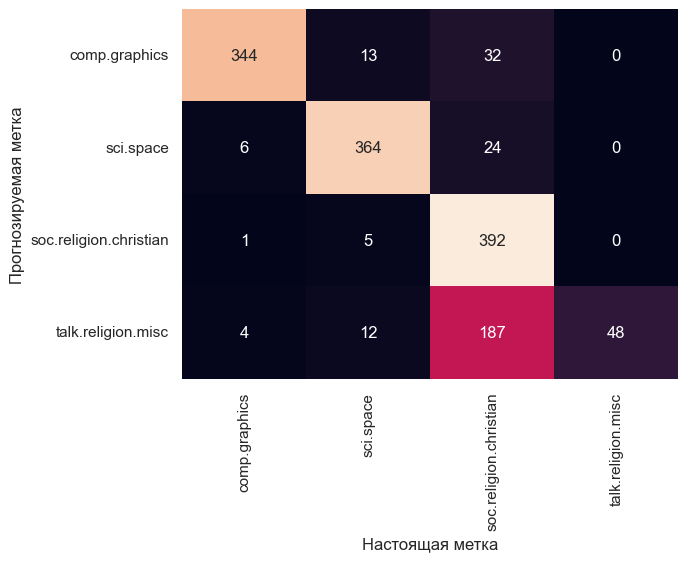

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat, annot=True, fmt='d', cbar=False, 
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Настоящая метка')
plt.ylabel('Прогнозируемая метка')

### Когда имеет смысл использовать наивный байесовский классификатор

- когда данные действительно соответствуют наивным допущениям (на практике бывает очень редко);
- для очень хорошо разделяемых категорий, когда сложность модели не столь важна;
- для данных с очень большим числом измерений, когда сложность модели не столь важна.